In [51]:
from villas.dataprocessing.readtools import *
#from villas.dataprocessing.timeseries import *

import villas.dataprocessing.timeseries as ts
import villas.dataprocessing.plottools as pt
import villas.dataprocessing.validationtools as vt

import matplotlib.pyplot as plt

import csv

### Read DPsim files

In [42]:
#path = '../../../logs/WSCC-9bus_cosim_extension/'
path = '../dpsim/logs/WSCC-9bus_cosim_extension/'
fileName = 'WSCC-9bus_cosim_extension'
resultFile = path + fileName + '.csv'

# returns list of timeseries-objects
ts_dpsim = read_timeseries_dpsim(resultFile)

column number: 19
results length: 100
real column names: ['P_Load1', 'P_Load2', 'P_Load3', 'Q_Load1', 'Q_Load2', 'Q_Load3', 'Vnom_Load1', 'Vnom_Load2', 'Vnom_Load3']
complex column names: ['I_Load1', 'I_Load2', 'I_Load3', 'I_line1', 'I_line2', 'I_line3', 'v_node1', 'v_node2', 'v_node3', 'v_node4']


I_Load1: 8.720747
I_Load2: 8.22233
I_Load3: 7.971906
I_line1: -24.951017999999998
I_line2: -16.215476000000002
I_line3: -7.978894
P_Load1: 30000000.0
P_Load2: 30000000.0
P_Load3: 30000000.0
Q_Load1: 10000000.0
Q_Load2: 10000000.0
Q_Load3: 10000000.0
Vnom_Load1: 222222.0
Vnom_Load2: 222222.0
Vnom_Load3: 222222.0
v_node1: 15588.457
v_node2: 14795.829753
v_node3: 14251.918852
v_node4: 13975.476990000001


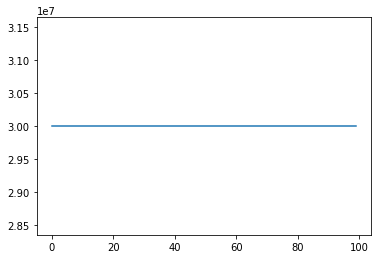

In [43]:
plt.plot(ts_dpsim['P_Load1'].values.real)

for item in ts_dpsim:
    print(str(item) + ": " + str(ts_dpsim[item].values.real[0]))
#for item in ts_dpsim:
    #value = ts.abs(item)
    #print(value)
#    print(ts_dpsim[item].abs())
#    print("-"ts

### Read DistAIX files

In [44]:
fileName = 'distaix'
resultFile = path + fileName + '.csv'

As DistAIX uses different headers, those have to be adapted to be used by villas.dataprocessing
TODO:

In [45]:
#with open(resultFile, 'r') as csvFile:
#    reader = csv.DictReader(csvFile)
#    print(next(reader))
#    print(next(reader))

In [47]:
ts_distaix = read_timeseries_csv(resultFile) 

column number: 4
results length: 100
real column names: ['Slosses', 'Srel']
complex column names: ['i1', 'i2']


Compare the timeseries created by DPsim and DistAIX and calculate the error

In [56]:
#print(vt.compare_timeseries(ts_dpsim['I_Load2'], ts_distaix['i2']))
print(ts_dpsim['I_Load2'])

rmse = ts.rmse(ts_dpsim['I_Load2'], ts_distaix['i2'])

AttributeError: module 'villas.dataprocessing.timeseries' has no attribute 'rmse'